# Assignment 8: Data Aggregation and Group Operations

## Overview
This assignment covers data aggregation and group operations using healthcare/insurance EHR data. You'll analyze patient encounters (insurance claims), healthcare providers, and medical facilities across different regions. The data includes provider statistics, facility information, and encounter charges with insurance coverage details.

## Setup

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set random seed for reproducibility
np.random.seed(42)

# Create output directory
os.makedirs('output', exist_ok=True)

## Question 1: Basic GroupBy Operations

### Part 1.1: Load and Explore Data

**TODO: Load and merge the datasets**

In [51]:
# TODO: Load the three CSV files into dataframes
provider_df = pd.read_csv("data/provider_data.csv")
facility_df = pd.read_csv("data/facility_data.csv")
encounter_df = pd.read_csv("data/encounter_data.csv")

# TODO: Print the shapes of each dataframe
print("Provider data shape:", provider_df.shape)
print("Facility data shape:", facility_df.shape)
print("Encounter data shape:", encounter_df.shape)

# TODO: Merge the dataframes for analysis
# Hint: Start by merging encounter_df with provider_df on 'provider_id'
#       Then merge the result with facility_df on 'facility_id'
# Note: Both encounter_df and provider_df have 'facility_id', and both encounter_df and facility_df have 'region'
#       After merging, you may need to handle duplicate column names (pandas will add suffixes like _x and _y)
#       You can drop one of the duplicate columns and rename if needed

merged_df = pd.merge(encounter_df, provider_df, on="provider_id", how="left")
merged_df = merged_df.drop(columns=["facility_id_y"]).rename(columns={"facility_id_x": "facility_id"})
merged_df = pd.merge(merged_df, facility_df, on="facility_id", how="left")
merged_df = merged_df.drop(columns=["region_y"]).rename(columns={"region_x": "region"})



# TODO: Print the merged dataframe shape, columns, and first few rows
print("\nMerged data shape:", merged_df.shape)
print("\nColumns:", merged_df.columns)
print("\nFirst few rows:", merged_df.head())


Provider data shape: (500, 7)
Facility data shape: (10, 6)
Encounter data shape: (5000, 12)

Merged data shape: (5000, 21)

Columns: Index(['encounter_id', 'patient_id', 'provider_id', 'facility_id',
       'encounter_date', 'encounter_type', 'diagnosis_code', 'procedure_code',
       'service_charge', 'insurance_paid', 'patient_paid', 'region',
       'provider_name', 'provider_type', 'specialty', 'years_experience',
       'license_number', 'facility_name', 'facility_type', 'beds',
       'established_date'],
      dtype='object')

First few rows:   encounter_id patient_id provider_id facility_id encounter_date  \
0     ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1     ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2     ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3     ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4     ENC00005   PAT01388      PR0354      FAC003     2023-06-14   

         encounter_type diagnosis_c

### Part 1.2: Basic Aggregation

**TODO: Perform basic groupby operations**

In [52]:
# TODO: Group by facility (healthcare facility) and calculate basic stats
# Group by facility
facility_group = merged_df.groupby("facility_id")

# TODO: Calculate mean, sum, count for years_experience by facility
first_stats = merged_df[['facility_id','provider_id','years_experience']].drop_duplicates().groupby('facility_id').agg(
    total_providers=('provider_id','count'),
    avg_years_experience=('years_experience','mean'),
    summation=('years_experience','sum')  
).reset_index()

# TODO: Calculate total encounter charges by facility
sec = facility_group.agg(
    total_service_charge=('service_charge','sum')
).reset_index()
# TODO: Calculate total insurance payments by facility
third = facility_group.agg(
    total_insurance_paid=('insurance_paid','sum')
).reset_index()
# TODO: Find the facility with highest total encounter charges
maximum = sec.loc[sec['total_service_charge'].idxmax()]
# TODO: Create a summary dataframe with one row per facility showing:
#       facility_name, total_providers, avg_years_experience, total_service_charge, total_insurance_paid

summary_df = first_stats.merge(sec, on='facility_id').merge(third, on='facility_id')
facility_names = merged_df[['facility_id','facility_name']].drop_duplicates()
summary_df = summary_df.merge(facility_names, on='facility_id')
summary_df = summary_df[['facility_name','total_providers','avg_years_experience','total_service_charge','total_insurance_paid']]

# TODO: Save the summary dataframe as 'output/q1_groupby_analysis.csv'

summary_df.to_csv('output/q1_groupby_analysis.csv', index=False)

### Part 1.3: Transform Operations

**TODO: Use transform operations to add group statistics**

In [62]:
# TODO: Add facility mean years_experience as new column
merged_df["facility_mean_years_experience"] = merged_df.groupby("facility_id")["years_experience"].transform("mean")
# TODO: Add facility standard deviation of years_experience
merged_df["facility_std_years_experience"] = merged_df.groupby("facility_id")["years_experience"].transform("std")
# TODO: Create normalized years_experience (z-score within facility)
merged_df["normalized_years_experience"] = (merged_df["years_experience"] - merged_df["facility_mean_years_experience"])/merged_df["facility_std_years_experience"]
# TODO: Add facility total encounter charges as new column
merged_df["facility_total_charges"] = merged_df.groupby("facility_id")["service_charge"].transform("sum")
# TODO: Display the enhanced dataframe
display(merged_df)
# TODO: Save results as 'output/q1_aggregation_report.txt'


with open("output/q1_aggregation_report.txt", "w") as f:
    f.write("Assignment 8 - Question 1\n")
    f.write("Groupby Analysis Summary:\n\n")
    f.write(merged_df.to_string(index=False)) 

,encounter_id,patient_id,provider_id,facility_id,encounter_date,encounter_type,diagnosis_code,procedure_code,service_charge,insurance_paid,...,years_experience,license_number,facility_name,facility_type,beds,established_date,facility_mean_years_experience,facility_std_years_experience,normalized_years_experience,facility_total_charges
0,ENC00001,PAT01564,PR0259,FAC004,2023-08-21,Office Visit,M79.3,99213,345.03,290.33,...,11,LIC000259,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.863495,297283.06
1,ENC00002,PAT00296,PR0258,FAC001,2023-09-11,Inpatient,N18.9,85025,550.48,482.51,...,19,LIC000258,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-0.052607,295508.13
2,ENC00003,PAT01381,PR0213,FAC001,2023-03-20,Lab,K21.9,80053,149.84,116.67,...,3,LIC000213,City General Hospital,Urgent Care,276,1999-11-27,19.563008,10.702137,-1.547636,295508.13
3,ENC00004,PAT01131,PR0146,FAC004,2023-09-03,Outpatient Procedure,H52.9,70450,1468.48,1198.71,...,6,LIC000146,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-1.336020,297283.06
4,ENC00005,PAT01388,PR0354,FAC003,2023-06-14,Emergency,G43.9,99214,672.23,507.22,...,36,LIC000354,Regional Medical Center,Urgent Care,459,1982-05-10,20.209205,11.575935,1.364105,316284.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ENC04996,PAT01045,PR0065,FAC002,2023-05-27,Emergency,K21.9,70450,5064.91,3932.06,...,36,LIC000065,Community Health Clinic,Urgent Care,160,2023-03-31,20.160784,11.044011,1.434191,334992.21
4996,ENC04997,PAT00658,PR0204,FAC004,2023-09-26,Lab,M79.3,99214,191.82,150.07,...,15,LIC000204,Northside Urgent Care,Urgent Care,313,1994-10-04,20.137014,10.581439,-0.485474,297283.06
4997,ENC04998,PAT01902,PR0174,FAC006,2023-04-25,Emergency,J44.9,80053,347.27,267.46,...,15,LIC000174,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,-0.402960,334927.30
4998,ENC04999,PAT00925,PR0083,FAC006,2023-01-09,Lab,M79.3,99213,157.93,111.65,...,24,LIC000083,Oncology Treatment Center,Hospital,252,1994-03-19,19.381139,10.872386,0.424825,334927.30


## Question 2: Advanced GroupBy Operations

### Part 2.1: Filter Operations

**TODO: Use filter operations to remove groups**

In [54]:
# TODO: Filter facilities with more than 20 providers (sufficient staffing)
sufficient_staffing = summary_df["total_providers"] > 20
# TODO: Filter facilities with average years_experience > 10 (experienced staff)
experienced_staff = summary_df["avg_years_experience"] > 10
# TODO: Filter facilities with total encounter charges > 250000 (high volume)
high_volume = summary_df["total_service_charge"] > 250000
# TODO: Create a summary of filtered results
filtered_df = summary_df[sufficient_staffing & experienced_staff & high_volume]
# TODO: Save results as 'output/q2_filter_analysis.csv'
filtered_df.to_csv("output/q2_filter_analysis.csv", index=False)

### Part 2.2: Apply Operations

**TODO: Use apply operations with custom functions**

In [63]:
# TODO: Create custom function to calculate provider statistics
def provider_stats(group):
    # TODO: Return mean, std, min, max, range for years_experience
    avg = group["years_experience"].mean()
    std = group["years_experience"].std()
    min_val = group["years_experience"].min()
    max_val = group["years_experience"].max()
    range = max_val - min_val
    ret = {
        "mean: ": avg,
        "standard deviation: ": std,
        "min: ": min_val,
        "max: ": max_val,
        "range: ": range
    }
    return ret

# TODO: Apply custom function to each facility
# Note: Add include_groups=False to avoid pandas FutureWarning about groupby columns
facility_provider_stats = merged_df.groupby('facility_name').apply(provider_stats, include_groups=False)

# TODO: Create function to find top providers in each facility
def top_providers(group, n=2):
    """Return top n providers in a group by encounter volume"""
    # TODO: Return top n rows by encounter count, selecting only provider_id, provider_name, 
    #       years_experience, specialty
    top = (
        group.groupby(['provider_id','provider_name','years_experience','specialty']).size().reset_index(name='encounter_count').sort_values('encounter_count', ascending=False).head(n)
    )
    return top

# TODO: Apply function to get top 2 providers per facility
# IMPORTANT: When using groupby().apply(), the result has a MultiIndex where:
# - Level 0: The grouping column (facility_name)
# - Level 1: The original row index from each group
# Use reset_index(level=0) to move only the grouping column back to a regular column
# DO NOT use reset_index(drop=True) - that would drop ALL index levels including facility_name!
top_providers_by_facility = merged_df.groupby('facility_name').apply(
    lambda x: top_providers(x, n=2)
).reset_index(level=0)  # Moves facility_name from index to column


report = top_providers_by_facility.merge(facility_provider_stats.reset_index(), on='facility_name',how='left')
# TODO: Save results as 'output/q2_performance_report.txt'
with open("output/q2_performance_report.txt", "w") as f:
    f.write("Assignment 8 - Question 2\n")
    f.write("Performance Report:\n\n")
    f.write(report.to_string(index=False))


/var/folders/fc/v3bqm1y90l17f7kqdx225_r80000gn/T/ipykernel_91222/2477692543.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_providers_by_facility = merged_df.groupby('facility_name').apply(


### Part 2.3: Hierarchical Grouping

**TODO: Perform multi-level grouping**

In [56]:
# TODO: Group by facility type and region
grouped = merged_df.groupby(["facility_type", "region"])
# TODO: Calculate statistics for each facility_type-region combination
stats = grouped["years_experience"].agg(["mean", "std", "min", "max", lambda x: x.max() - x.min()])
stats.rename(columns={"<lambda_0>": "range"}, inplace=True)
# TODO: Use unstack to convert to wide format
wide = stats.unstack(level=-1)
# TODO: Use stack to convert back to long format
long = wide.stack(level=-1)
# TODO: Analyze the hierarchical structure
print(grouped.head())
# TODO: Save results as 'output/q2_hierarchical_analysis.csv'
long = long.reset_index()
long.to_csv("output/q2_hierarchical_analysis.csv", index=False)

   encounter_id patient_id provider_id facility_id encounter_date  \
0      ENC00001   PAT01564      PR0259      FAC004     2023-08-21   
1      ENC00002   PAT00296      PR0258      FAC001     2023-09-11   
2      ENC00003   PAT01381      PR0213      FAC001     2023-03-20   
3      ENC00004   PAT01131      PR0146      FAC004     2023-09-03   
4      ENC00005   PAT01388      PR0354      FAC003     2023-06-14   
5      ENC00006   PAT01849      PR0118      FAC004     2023-05-24   
6      ENC00007   PAT00833      PR0193      FAC004     2023-05-05   
7      ENC00008   PAT01503      PR0475      FAC001     2023-02-06   
8      ENC00009   PAT01510      PR0321      FAC004     2023-03-03   
10     ENC00011   PAT01851      PR0125      FAC005     2023-04-16   
11     ENC00012   PAT01059      PR0087      FAC006     2023-08-09   
13     ENC00014   PAT01403      PR0343      FAC003     2023-05-11   
14     ENC00015   PAT00942      PR0383      FAC005     2023-12-19   
15     ENC00016   PAT01661      PR

/var/folders/fc/v3bqm1y90l17f7kqdx225_r80000gn/T/ipykernel_91222/454348900.py:9: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  long = wide.stack(level=-1)


## Question 3: Pivot Tables and Cross-Tabulations

### Part 3.1: Basic Pivot Tables

**TODO: Create pivot tables for multi-dimensional analysis**

In [ ]:
# TODO: Create pivot table: encounter charges by procedure code and region
# TODO: Create pivot table with multiple aggregations (sum, mean, count)
# TODO: Add totals (margins) to pivot table
# TODO: Handle missing values with fill_value

pivot_table = pd.pivot_table(
    merged_df,
    index="procedure_code",
    columns="region",
    values="service_charge",
    aggfunc=["sum", "mean", "count"],  
    fill_value=0,               
    margins=True,               
    margins_name="Total" 
)

pivot_table.columns = [f"{agg}_{region}" for agg, region in pivot_table.columns]
pivot_table = pivot_table.apply(pd.to_numeric, errors='coerce').fillna(0)



# Tip: When saving a pivot table to CSV, the index (row labels) is preserved by default.
#      This is usually desired - when reading back, use index_col=0 to restore the index.
# TODO: Save results as 'output/q3_pivot_analysis.csv'
pivot_table.to_csv("output/q3_pivot_analysis.csv")

### Part 3.2: Cross-Tabulations

**TODO: Create cross-tabulations for categorical analysis**

In [58]:
# TODO: Create crosstab of facility type vs region with counts
ct1 = pd.crosstab(merged_df["facility_type"],merged_df["region"])
# TODO: Create crosstab with margins (row and column totals)
ct2 = pd.crosstab(merged_df["facility_type"],merged_df["region"],margins=True, margins_name="Total")
# TODO: Create multi-dimensional crosstab showing facility type × encounter type × region combinations
#       (Hint: use pd.crosstab with multiple index/column parameters, or create manually from the data)
ct3 = pd.crosstab([merged_df["facility_type"],merged_df["encounter_type"]],merged_df["region"],margins=True, margins_name="Total")
# TODO: Analyze the cross-tabulation results
print(ct1,"\n")
print(ct2,"\n")
print(ct3)
# TODO: Save results as 'output/q3_crosstab_analysis.csv'
ct3.to_csv("output/q3_crosstab_analysis.csv")

region            North  South  West
facility_type                       
Hospital              0    509     0
Specialty Center      0   1026   946
Urgent Care         510    970  1039 

region            North  South  West  Total
facility_type                              
Hospital              0    509     0    509
Specialty Center      0   1026   946   1972
Urgent Care         510    970  1039   2519
Total               510   2505  1985   5000 

region                                 North  South  West  Total
facility_type    encounter_type                                 
Hospital         Emergency                 0    127     0    127
                 Inpatient                 0     95     0     95
                 Lab                       0    100     0    100
                 Office Visit              0     85     0     85
                 Outpatient Procedure      0    102     0    102
Specialty Center Emergency                 0    236   182    418
                 Inpatient 

### Part 3.3: Pivot Table Visualization

**TODO: Create visualizations from pivot tables**

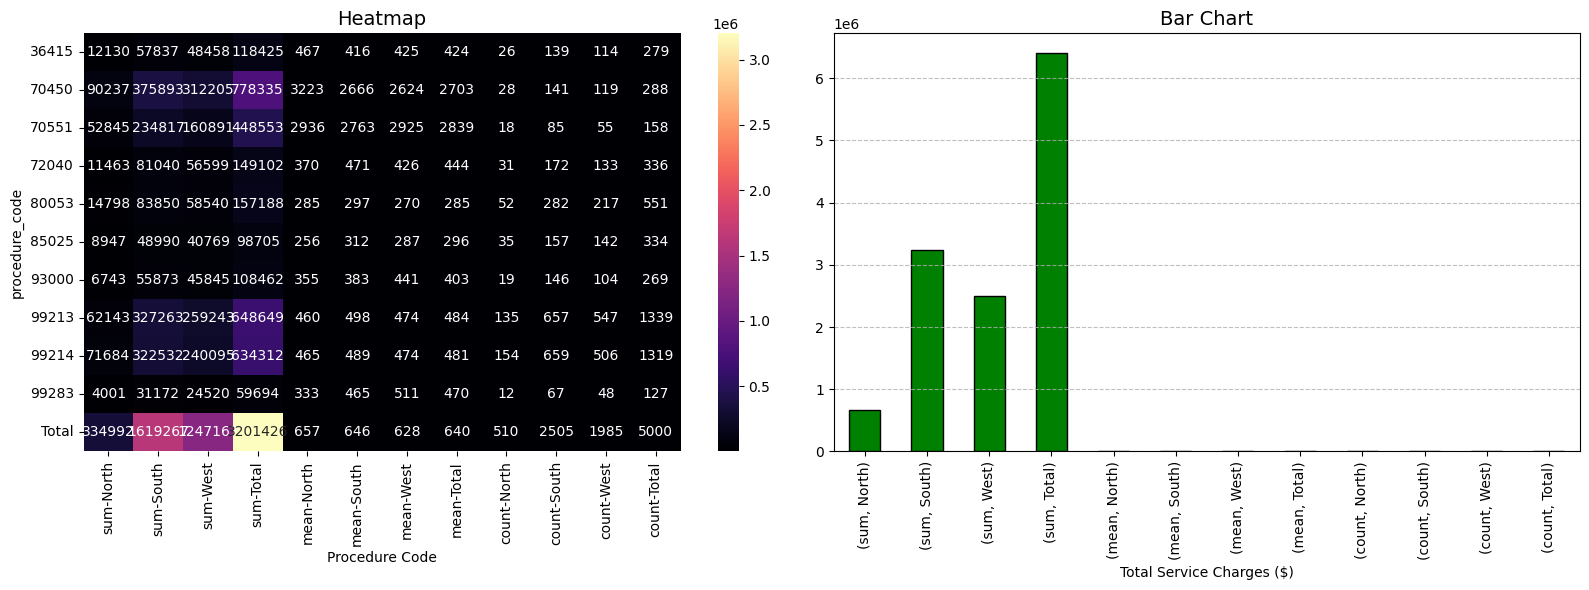

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# TODO: Create heatmap from pivot table

sns.heatmap(pivot_table, cmap="magma", annot=True, fmt=".0f", ax=axes[0])
axes[0].set_title("Heatmap", fontsize=14)
axes[0].set_xlabel("Region")
axes[0].set_xlabel("Procedure Code")

# TODO: Create bar chart from pivot table

pivot_table.sum(axis=0).plot(kind="bar", color="green", edgecolor="black", ax=axes[1])
axes[1].set_title("Bar Chart", fontsize=14)
axes[1].set_xlabel("Region")
axes[1].set_xlabel("Total Service Charges ($)")
axes[1].grid(axis="y", linestyle="--", alpha=0.8)
plt.tight_layout()


# TODO: Save the plot as 'output/q3_pivot_visualization.png'
plt.savefig("output/q3_pivot_visualization.png")


In [60]:
with open("output/q1_aggregation_report.txt", "w") as f:
    f.write("Assignment 8 - Question 1\n")
    f.write("Aggregated Data Summary:\n\n")



with open("output/q2_performance_report.txt", "w") as f:
    f.write("Assignment 8 - Question 2\n")
    f.write("Performance Report by Facility / Provider:\n\n")



## Submission Checklist

Before submitting, verify you've created:

- [ ] `output/q1_groupby_analysis.csv` - Basic groupby analysis
- [ ] `output/q1_aggregation_report.txt` - Aggregation report
- [ ] `output/q2_filter_analysis.csv` - Filter operations analysis
- [ ] `output/q2_hierarchical_analysis.csv` - Hierarchical analysis
- [ ] `output/q2_performance_report.txt` - Performance report
- [ ] `output/q3_pivot_analysis.csv` - Pivot table analysis
- [ ] `output/q3_crosstab_analysis.csv` - Cross-tabulation analysis
- [ ] `output/q3_pivot_visualization.png` - Pivot visualization

## Key Learning Objectives

- Master the split-apply-combine paradigm
- Apply aggregation functions and transformations
- Create pivot tables for multi-dimensional analysis
- Apply advanced groupby techniques